### Import Libraries

In [1]:
import sklearn 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GroupKFold, cross_val_score

### Load Data

In [2]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['weight_loss.csv']

weight_data = ds.to_dataframe()

In [3]:
weight_data

,Patient_ID,Treatment,Height,Weight
0,1,Before,160,160
1,1,After,160,130
2,2,Before,170,170
3,2,After,170,140
4,3,Before,155,155
5,3,After,155,125
6,4,Before,169,169
7,4,After,169,139


In [4]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
weight_data['Treatment'] = label_encoding.fit_transform(weight_data['Treatment'].astype(str))

weight_data

,Patient_ID,Treatment,Height,Weight
0,1,1,160,160
1,1,0,160,130
2,2,1,170,170
3,2,0,170,140
4,3,1,155,155
5,3,0,155,125
6,4,1,169,169
7,4,0,169,139


In [5]:
before_treatment = weight_data['Treatment'] == 1

weight_data[before_treatment]

,Patient_ID,Treatment,Height,Weight
0,1,1,160,160
2,2,1,170,170
4,3,1,155,155
6,4,1,169,169


In [6]:
after_treatment = weight_data['Treatment'] == 0

weight_data[after_treatment]

,Patient_ID,Treatment,Height,Weight
1,1,0,160,130
3,2,0,170,140
5,3,0,155,125
7,4,0,169,139


If we will plot before transfer and after transfer values and it should be parallel lines as the difference is constant in Heights of a treated patient.

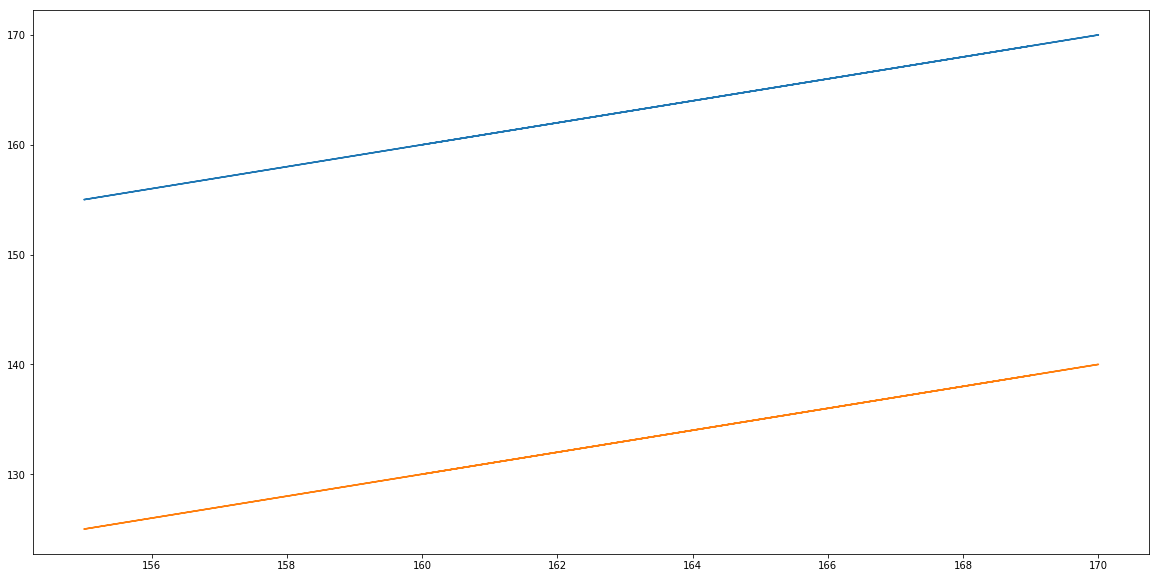

In [7]:
plt.figure(figsize=(20, 10))

plt.plot(weight_data[before_treatment]['Height'], weight_data[before_treatment]['Weight'])
plt.plot(weight_data[after_treatment]['Height'], weight_data[after_treatment]['Weight'])

plt.show()

In [8]:
X = weight_data.drop(['Height','Patient_ID'], axis=1)

Y = weight_data['Height']

groups = weight_data['Patient_ID']

### Group K-fold
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html#sklearn.model_selection.GroupKFold 

GroupKFold is a variation of k-fold which ensures that the same group is not represented in both testing and training sets.

In [9]:
gkf = GroupKFold(n_splits=4)

In [10]:
i = 1

for train, test in gkf.split(X, Y, groups):
    print("\nTrain" + str(i), train)
    print("Test" + str(i), test)
    
    i += 1


Train1 [0 1 2 3 4 5]
Test1 [6 7]

Train2 [0 1 2 3 6 7]
Test2 [4 5]

Train3 [0 1 4 5 6 7]
Test3 [2 3]

Train4 [2 3 4 5 6 7]
Test4 [0 1]


In [11]:
len(X), len(train), len(test)

(8, 6, 2)

In [12]:
gkf = GroupKFold(n_splits=2)

In [13]:
i = 1

for train, test in gkf.split(X, Y, groups):
    print("\nTrain" + str(i), train)
    print("Test" + str(i), test)
    
    i += 1


Train1 [0 1 4 5]
Test1 [2 3 6 7]

Train2 [2 3 6 7]
Test2 [0 1 4 5]


In [1]:
!pip show matplotlib

Name: matplotlib
Version: 2.1.2
Summary: Python plotting package
Home-page: http://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: BSD
Location: /anaconda3/lib/python3.6/site-packages
Requires: numpy, six, python-dateutil, pytz, cycler, pyparsing
Required-by: seaborn, scikit-image
